# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, 
                       on='Mouse ID', how='left')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(duplicate_mouse_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = combined_df[combined_df.duplicated(subset='Mouse ID', keep=False)]
duplicate_mouse_ids.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28
10,z234,0,45.0,0,Naftisol,Female,19,27


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates()
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(clean_df['Mouse ID'].unique())
mice_number

249

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().rename('mean').to_frame()
summary_df['median'] = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_df['var'] = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_df['std'] = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_df['sem'] = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Reset index to make 'Drug Regimen' a column instead of the index
summary_df.reset_index(inplace=True)

# Assemble the resulting series into a single summary DataFrame.
print(summary_df)

  Drug Regimen       mean     median        var       std       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.368318  50.909965  42.278090  6.502160  0.514041
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

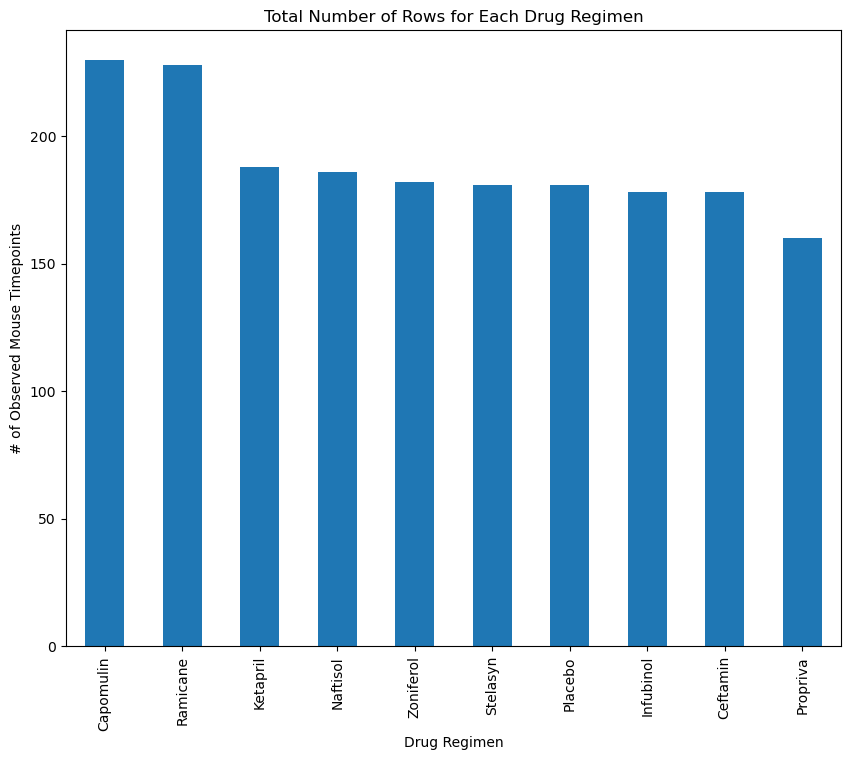

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_df['Drug Regimen'].value_counts()

counts.plot(kind='bar', figsize=(10, 8))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

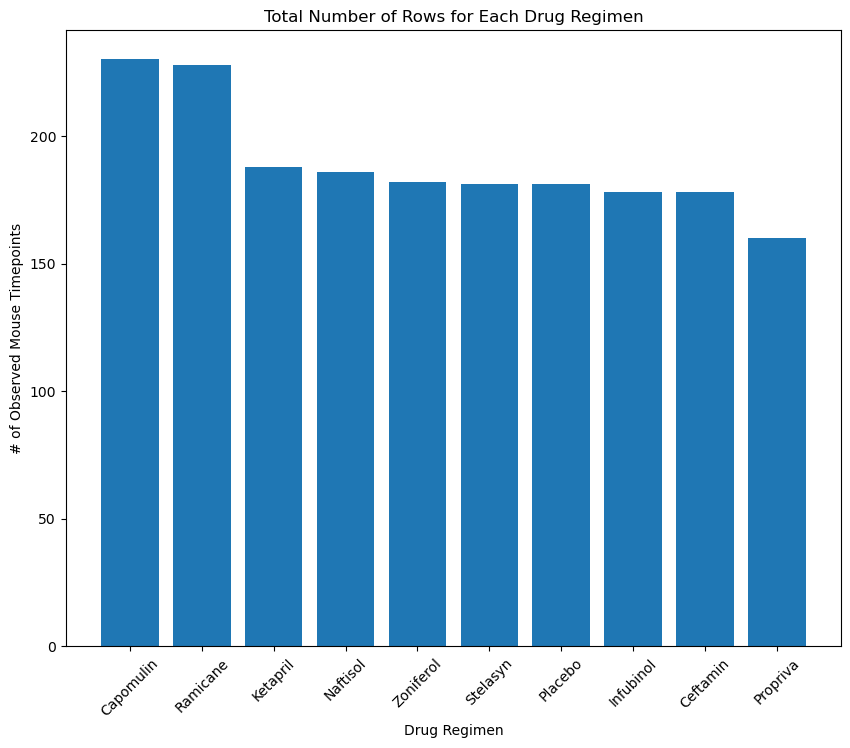

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 8))
plt.bar(counts.index, counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()


In [21]:
mice_sex = duplicate_mouse_ids['Sex'].value_counts()
mice_sex

Sex
Male      953
Female    928
Name: count, dtype: int64

In [22]:
Sex = ['male', 'female']
colors =['blue','orange']


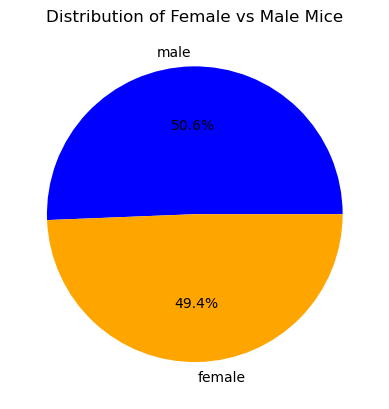

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df['Sex'].value_counts()
plt.pie(mice_sex, labels=Sex, colors= colors,
        autopct="%1.1f%%", )
plt.title('Distribution of Female vs Male Mice')
plt.show()

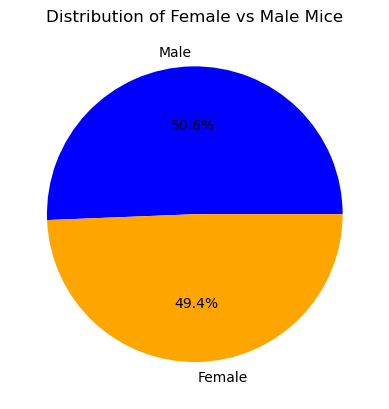

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = clean_df['Sex'].value_counts()
plt.pie(mice_sex, labels=mice_sex.index, colors= colors,
        autopct="%1.1f%%")
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
duplicate_mouse_ids = combined_df[combined_df.duplicated(subset='Mouse ID', keep=False)]
duplicate_mouse_ids.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28
10,z234,0,45.0,0,Naftisol,Female,19,27


In [26]:
tumor_volume = clean_df['Drug Regimen'].value_counts()
tumor_volume
              

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     160
Name: count, dtype: int64

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])
desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(desired_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin'], ['Ramicane'], ['Infubinol'], ['Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
for t in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatments]['Tumor Volume (mm3)']

    tumor_vol_data.append(treatment_data)
   
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
 # Determine outliers using upper and lower bounds
outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    



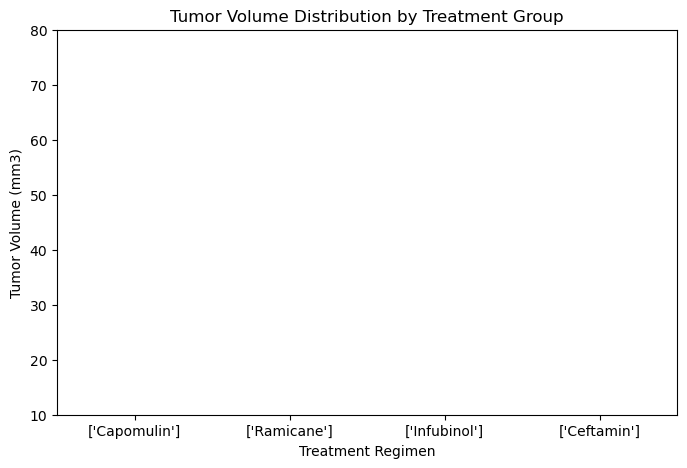

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 5))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markersize=10, markerfacecolor='red'))
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(10, 80)  
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

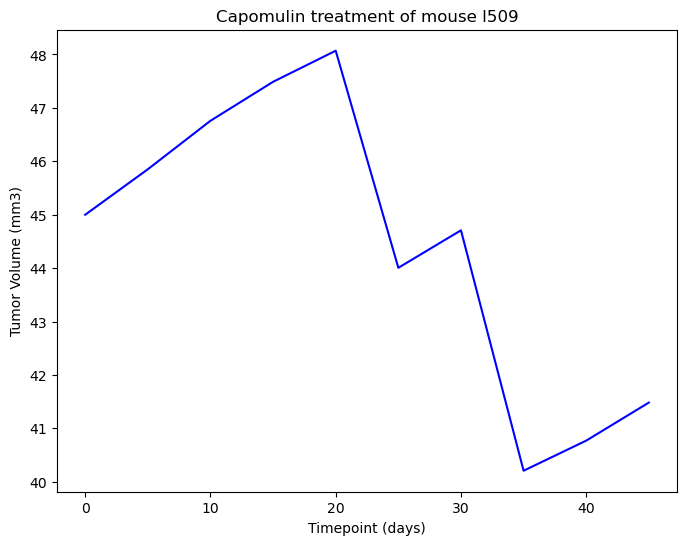

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
single_mouse_id = 'l509' 
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == single_mouse_id]
plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'],  color='b', linestyle='-')
plt.title(f'Capomulin treatment of mouse {single_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

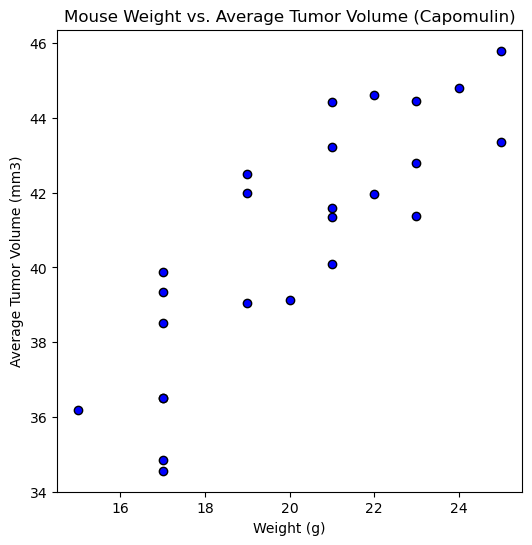

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.figure(figsize=(6, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared Value: 0.7088568047708723


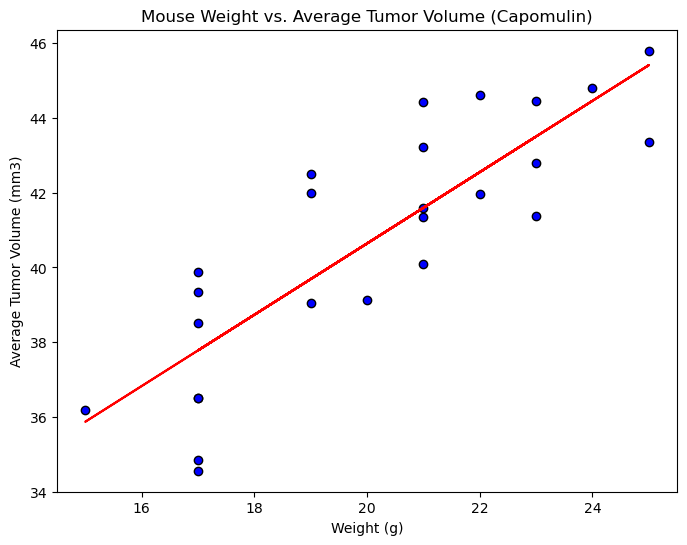

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

correlation_coefficient, _ = pearsonr(capomulin_mouse_weight, capomulin_avg_tumor_volume)
rounded_correlation_coefficient = round(correlation_coefficient, 2)
print("The correlation between mouse weight and the average tumor volume is:", rounded_correlation_coefficient)

slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_weight, capomulin_avg_tumor_volume)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared Value:", r_value**2)

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', label='Data Points')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(capomulin_mouse_weight, slope * capomulin_mouse_weight + intercept, color='red', label='Linear Regression')

plt.show()
